# DL: Build and Train a CNN for MNIST Handwritten Digit Recognition


# Objective:

The goal of this project is to build a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. The MNIST dataset contains 70,000 grayscale images of digits (0-9), each 28x28 pixels in size. Using TensorFlow and Keras, we will create and train a deep learning model to classify these digits accurately. The project involves data preprocessing, model building, training, and evaluation to understand CNNs and their application .


In [1]:
!pip install tensorflow

Load the MNIST dataset correctly :

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


In [3]:
tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Data Preprocessing:

In [4]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(y_train)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

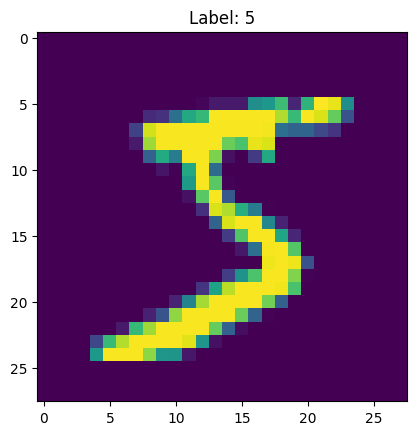

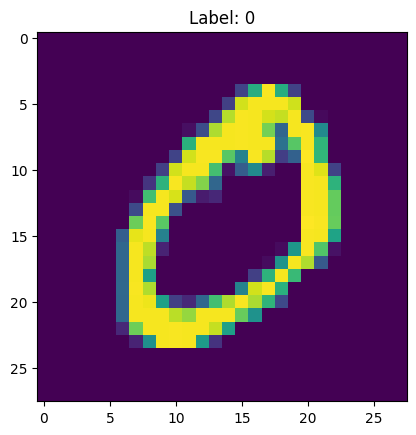

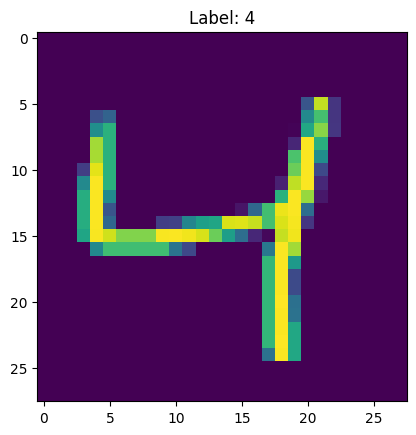

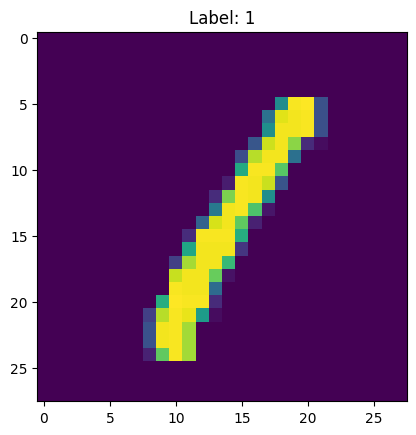

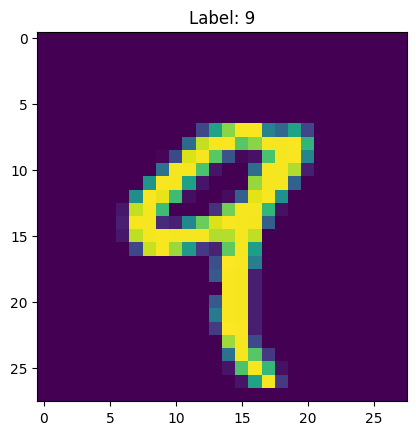

In [5]:
# Display the first 10 images and labels from the training set
for i in range(5): # 0,1..9
    plt.imshow(x_train[i])  # Display the i-th image
    plt.title("Label: " + str(y_train[i]))  # Display the corresponding label
    plt.show()                           # Show the image


Normalize the pixel values between 0 and 1:

In [6]:
# Normalize the images to values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train.shape[0]

60000

In [8]:
# Reshape the images to add the channel dimension (since they are grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 10) #0,1,2,3,4,5,6,7,8,9
y_test = tf.keras.utils.to_categorical(y_test, 10)

Build a CNN with Convolutional layers (3 marks).

Include MaxPooling layers (2 marks).

Add Dense layers and the correct output layer with 10 neurons and softmax activation (2 marks).


In [10]:
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Use the 'adam' optimizer (1 mark).

Set the loss function to 'categorical_crossentropy' (1 mark).

Track accuracy as the metric (1 mark).

Train the model (3 marks).

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8997 - loss: 0.3268 - val_accuracy: 0.9838 - val_loss: 0.0448
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9850 - loss: 0.0506 - val_accuracy: 0.9876 - val_loss: 0.0368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9889 - val_loss: 0.0355
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9927 - loss: 0.0235 - val_accuracy: 0.9925 - val_loss: 0.0241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9908 - val_loss: 0.0313


Track both training and validation accuracy/loss (2 marks).

Evaluate the model on test data (3 marks)

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 3s - 8ms/step - accuracy: 0.9908 - loss: 0.0313

Test accuracy: 0.9908


In [14]:
history.history['accuracy'] #train accuracy

[0.9553666710853577,
 0.9851333498954773,
 0.9896500110626221,
 0.9918833374977112,
 0.9935666918754578]

In [15]:
history.history['val_accuracy'] #validation accuracy

[0.9837999939918518,
 0.9876000285148621,
 0.9889000058174133,
 0.9925000071525574,
 0.9908000230789185]

Plot accuracy and loss graphs (2 marks)

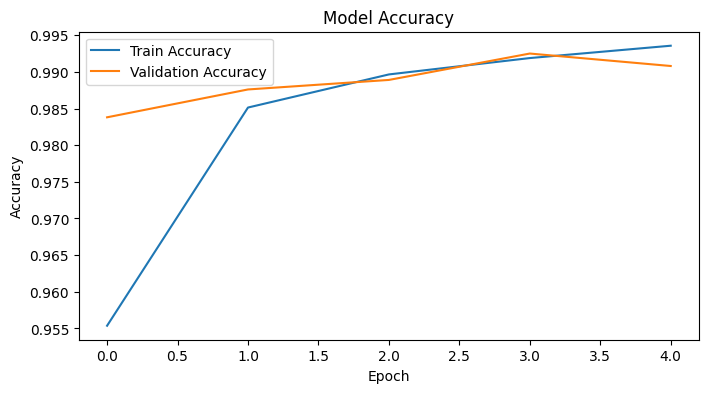

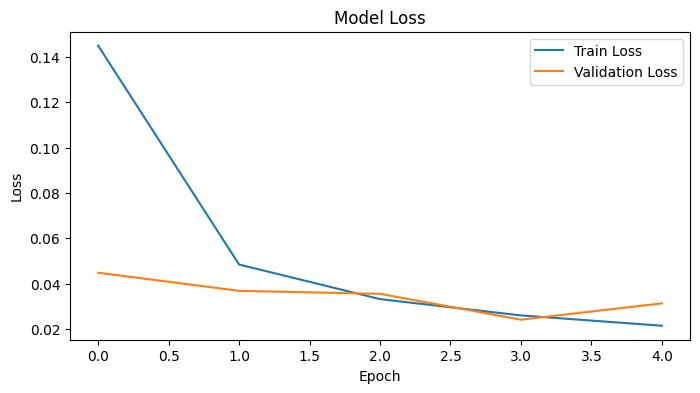

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [17]:
# Save the model
model.save('modelcnn.h5')  # Save the model to a file named 'my_model.h5' hdf5


## Text with unseen data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


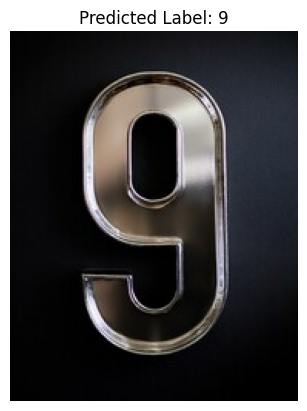

In [25]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model (replace 'model.h5' with your actual model file)
model = tf.keras.models.load_model('modelcnn.h5')

# Load and preprocess the new image
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((28, 28))  # Resize image to 28x28 pixels
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize the image
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for the model
    return img_array

# Path to the new image
image_path = "/content/240_F_1055579779_batxCnB0tqmm2p1dnLSoSonBJkcwUQJt.jpg"
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction, axis=1)


# Display the image and the prediction
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label[0]}")
plt.axis('off')
plt.show()